In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Neural Network avec selection de features 

Ici on utilise keras pour faciliter les prototypes.

## Librairies 

In [3]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Données 

In [4]:
from transplant.data.learningset import Learningset

learningset = Learningset()

#X_train, X_test, y_train, y_test, X_col = learningset.get_data_merged_dynamic_flatten_full()
train, test = learningset.get_data_merged_dynamic_flatten_full(full_df=True)

In [5]:
choix_features_1=['PEEPtotal_std',
 'Temp_mean',
 'ETCO2_mean',
 'FiO2_std',
 'LAS',
 'Poids',
 'SpO2_mean',
 'BIS SR_std']

In [6]:
choix_features_2=['PEEPtotal_std',
 'Temp_mean',
 'ETCO2_mean',
 'FiO2_std',
 'LAS',
 'Poids',
 'SpO2_mean',
 'Age_donor',
 'LAS',
 'PF_donor',
 'Poids',
 'Tabagisme_donor',
 'time_on_waiting_liste',
 'start_operation_day',
 'ends_operation_day',
 'B.I.S_mean',
 'VT_mean',
 'BIS SR_std',
 'SpO2_std',
 'B.I.S_max',
 'BIS SR_max',
 'VT_max',
 'FC_min',
 'FiO2_min',
 'PAPdia_min',
 'PASm_min',
 'SpO2_min']

##### On choisit les features ici :

In [7]:
Choix_Features=choix_features_1

In [8]:
num_feat=len(Choix_Features)

In [9]:
X_train=train[Choix_Features].values 
X_test=test[Choix_Features].values
y_train=train['target'].values
y_test=test['target'].values

In [10]:
y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((241, 8), (101, 8), (241, 1), (101, 1))

In [12]:
# On utilise plus ça mais au cas où
#y_train = keras.utils.to_categorical(y_train, num_classes=2)
#y_test = keras.utils.to_categorical(y_test, num_classes=2)

##### Ici si on veut centrer réduire nos données ( pas de leakage car on utilise la réduction du train set sur le test set

In [13]:
from sklearn.preprocessing import StandardScaler

reduire_centrer=True


if reduire_centrer :
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)
    
##On check avec X_train.mean(axis=0)

## Modèle simple 

In [14]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [15]:
model = Sequential()
model.add(Dense(num_feat, input_dim=num_feat, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5)) #Très efficacee contre overfitting 
model.add(Dense(num_feat//2,  kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [16]:
model.fit(X_train, y_train,
          epochs=100,
          batch_size=5)

Epoch 1/100
241/241 [==============================] - 1s 3ms/step - loss: 0.6931 - acc: 0.5062
Epoch 2/100
241/241 [==============================] - 0s 647us/step - loss: 0.6918 - acc: 0.5643
Epoch 3/100
241/241 [==============================] - 0s 543us/step - loss: 0.6908 - acc: 0.5685
Epoch 4/100
241/241 [==============================] - ETA: 0s - loss: 0.6899 - acc: 0.568 - 0s 655us/step - loss: 0.6898 - acc: 0.5685
Epoch 5/100
241/241 [==============================] - 0s 597us/step - loss: 0.6890 - acc: 0.5685
Epoch 6/100
241/241 [==============================] - 0s 664us/step - loss: 0.6877 - acc: 0.5685
Epoch 7/100
241/241 [==============================] - 0s 605us/step - loss: 0.6851 - acc: 0.5685
Epoch 8/100
241/241 [==============================] - 0s 630us/step - loss: 0.6806 - acc: 0.5685
Epoch 9/100
241/241 [==============================] - 0s 647us/step - loss: 0.6759 - acc: 0.5726
Epoch 10/100
241/241 [==============================] - 0s 560us/step - loss: 0.66

241/241 [==============================] - 0s 693us/step - loss: 0.6108 - acc: 0.6722
Epoch 84/100
241/241 [==============================] - 0s 560us/step - loss: 0.6205 - acc: 0.6432
Epoch 85/100
241/241 [==============================] - 0s 630us/step - loss: 0.6211 - acc: 0.6639
Epoch 86/100
241/241 [==============================] - 0s 535us/step - loss: 0.5975 - acc: 0.6763
Epoch 87/100
241/241 [==============================] - 0s 560us/step - loss: 0.6111 - acc: 0.6763
Epoch 88/100
241/241 [==============================] - 0s 560us/step - loss: 0.5928 - acc: 0.6763
Epoch 89/100
241/241 [==============================] - 0s 643us/step - loss: 0.6075 - acc: 0.6680
Epoch 90/100
241/241 [==============================] - 0s 610us/step - loss: 0.6318 - acc: 0.6639
Epoch 91/100
241/241 [==============================] - 0s 626us/step - loss: 0.5899 - acc: 0.6846
Epoch 92/100
241/241 [==============================] - 0s 684us/step - loss: 0.6473 - acc: 0.6763
Epoch 93/100
241/241 [=

In [17]:
## On overfit de ouf ...

In [18]:
score = model.evaluate(X_test, y_test, batch_size=50)

101/101 [==============================] - 0s 970us/step


In [19]:
score 

[0.6328238473080172, 0.6633663531577233]

## Résultats 

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [21]:
#y_test_pred_cls=np.array(list(map(np.argmax,model.predict(X_test))))
#y_test_cls=np.array(list(map(np.argmax,y_test)))
y_test_pred_cls=(model.predict(X_test)>0.5)*1

In [22]:
conf_matrix=confusion_matrix(y_test,y_test_pred_cls)

In [23]:
conf_matrix/(len(y_test))

array([[0.37623762, 0.20792079],
       [0.12871287, 0.28712871]])

In [24]:
conf_matrix_proba=conf_matrix/(len(y_test))

In [25]:
print(metrics.classification_report(y_test,y_test_pred_cls))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69        59
           1       0.58      0.69      0.63        42

   micro avg       0.66      0.66      0.66       101
   macro avg       0.66      0.67      0.66       101
weighted avg       0.68      0.66      0.67       101



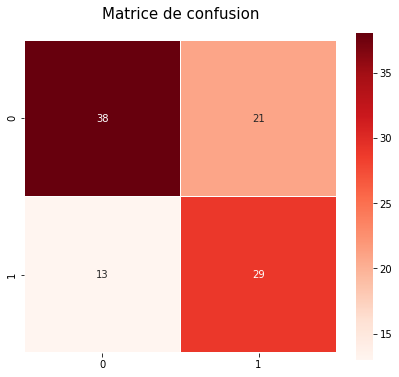

In [26]:
colormap = plt.cm.Reds
plt.figure(figsize=(7,6))
plt.title('Matrice de confusion', y=1.05, size=15)
sns.heatmap(conf_matrix,linewidths=0.1, 
            square=True, cmap=colormap, linecolor='white', annot=True)

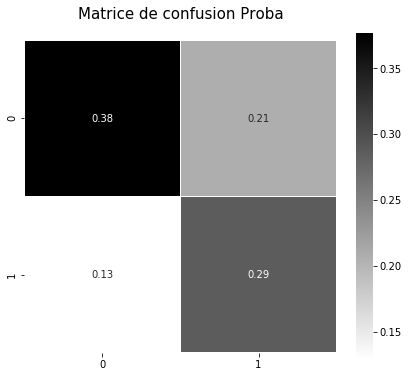

In [27]:
colormap = plt.cm.binary
plt.figure(figsize=(7,6))
plt.title('Matrice de confusion Proba', y=1.05, size=15)
sns.heatmap(conf_matrix_proba,linewidths=0.1, 
            square=True, cmap=colormap, linecolor='white', annot=True)